Se ha usado ChatGPT para el brainstorming y GitHub Copilot para el autocompletado.

Usamos floyd-warshall para obtener la distancia más corta entre todos los pares de nodos

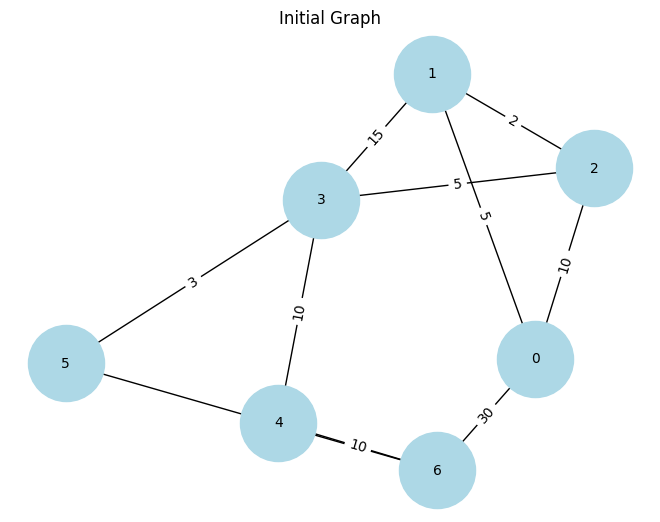

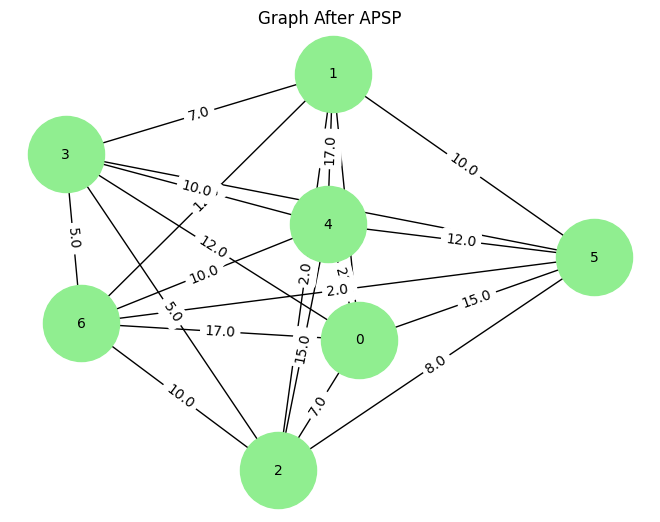

Shortest Path Matrix (APSP):
[[ 0.  5.  7. 12. 22. 15. 17.]
 [ 5.  0.  2.  7. 17. 10. 12.]
 [ 7.  2.  0.  5. 15.  8. 10.]
 [12.  7.  5.  0. 10.  3.  5.]
 [22. 17. 15. 10.  0. 12. 10.]
 [15. 10.  8.  3. 12.  0.  2.]
 [17. 12. 10.  5. 10.  2.  0.]]


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Number of nodes (warehouses and clients)
n = 7

# Initialize the adjacency matrix (distances between nodes)
INF = float('inf')
dist = np.full((n, n), INF)
for i in range(n):
    dist[i][i] = 0  # Distance from a node to itself is 0

# Define the known distances between the nodes
edges = [
    (0, 1, 5), (0, 2, 10), (1, 2, 2), (1, 3, 15),
    (2, 3, 5), (3, 4, 10), (3, 5, 3), (4, 6, 10),
    (5, 6, 2), (0, 6, 30)
]

for u, v, cost in edges:
    dist[u][v] = cost
    dist[v][u] = cost  # Assuming bidirectional routes

# Floyd-Warshall algorithm for APSP
def floyd_warshall(dist):
    n = len(dist)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    return dist

# Apply Floyd-Warshall to find the shortest paths
shortest_paths = floyd_warshall(dist)

# Function to visualize the graph using NetworkX
def draw_graph():
    G = nx.Graph()
    for u, v, cost in edges:
        G.add_edge(u, v, weight=cost)
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Initial Graph")
    plt.show()

# Function to visualize the APSP result (distance matrix)
def draw_apsp_graph():
    G = nx.Graph()
    for i in range(n):
        for j in range(i + 1, n):
            if shortest_paths[i][j] < INF:
                G.add_edge(i, j, weight=shortest_paths[i][j])
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Graph After APSP")
    plt.show()

# Draw the initial graph
draw_graph()

# Draw the resulting graph after applying APSP
draw_apsp_graph()

# Print the resulting shortest path matrix
print("Shortest Path Matrix (APSP):")
print(shortest_paths)
